**THỰC HIỆN PHÂN LOẠI VỚI MULTI CLASS SVM, SAU ĐÓ SO SÁNH VỚI SOFTMAX REGRESSION**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:/HUS_22001541/MachineLearning/Project/data/ObesityDataSet_raw_and_data_sinthetic.csv", header=0)
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
from sklearn.preprocessing import LabelEncoder

# gender calc caec mtrans

# one hot
data_encoded = pd.get_dummies(data, columns=['Gender', 'CALC', 'CAEC', 'MTRANS'], drop_first=True)

# label encoder
label_encoder = LabelEncoder()
cols_to_encode = ['FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'NObeyesdad']

for col in cols_to_encode:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

# print(data_encoded.head())
data_encoded.head()

,Age,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,...,CALC_Frequently,CALC_Sometimes,CALC_no,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,0,170,477,0,0,549,1,...,False,False,True,False,True,False,False,False,True,False
1,21.0,1.52,56.0,0,809,477,1,1,1267,1,...,False,True,False,False,True,False,False,False,True,False
2,23.0,1.80,77.0,0,170,477,0,0,549,1,...,True,False,False,False,True,False,False,False,True,False
3,27.0,1.80,87.0,0,809,477,0,0,549,0,...,True,False,False,False,True,False,False,False,False,True
4,22.0,1.78,89.8,0,170,0,0,0,549,0,...,False,True,False,False,True,False,False,False,True,False


In [4]:
data = data_encoded

In [5]:
data.head()

,Age,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,...,CALC_Frequently,CALC_Sometimes,CALC_no,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,0,170,477,0,0,549,1,...,False,False,True,False,True,False,False,False,True,False
1,21.0,1.52,56.0,0,809,477,1,1,1267,1,...,False,True,False,False,True,False,False,False,True,False
2,23.0,1.80,77.0,0,170,477,0,0,549,1,...,True,False,False,False,True,False,False,False,True,False
3,27.0,1.80,87.0,0,809,477,0,0,549,0,...,True,False,False,False,True,False,False,False,False,True
4,22.0,1.78,89.8,0,170,0,0,0,549,0,...,False,True,False,False,True,False,False,False,True,False


In [6]:
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

In [7]:
y

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 2111, dtype: int32

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Tiền xử lý dữ liệu (chuẩn hóa các giá trị)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


Dùng softmax

c:\Users\Admin\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\anaconda3

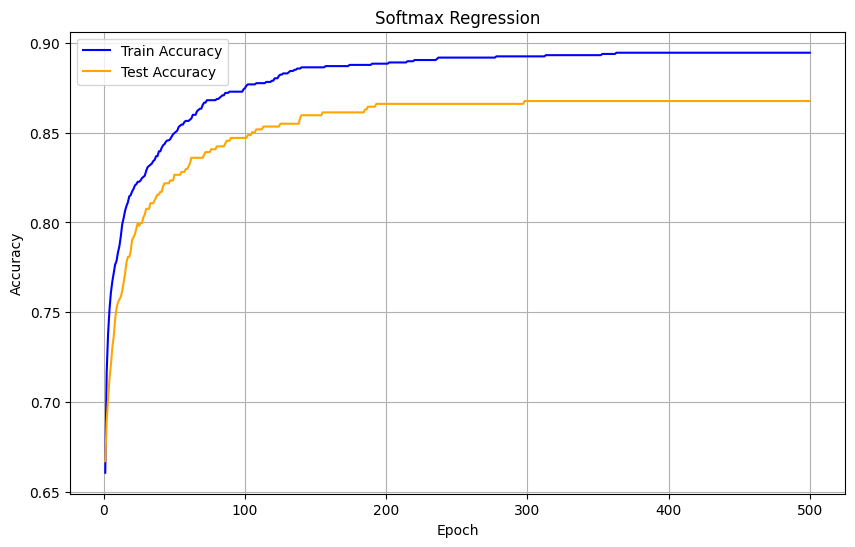

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg_model_visual = LogisticRegression(
    multi_class='multinomial', 
    solver='saga', 
    max_iter=1,  
    warm_start=True, 
    random_state=42
)

train_accuracies = []
test_accuracies = []

for epoch in range(500):  
    log_reg_model_visual.fit(X_train, y_train)  
    # Tính accuracy trên tập train và test
    train_acc = accuracy_score(y_train, log_reg_model_visual.predict(X_train))
    test_acc = accuracy_score(y_test, log_reg_model_visual.predict(X_test))
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 501), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(1, 501), test_accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Softmax Regression')
plt.legend()
plt.grid()
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=400)

log_reg_model.fit(X_train, y_train)

y_pred_softmax = log_reg_model.predict(X_test)

print(classification_report(y_test, y_pred_softmax))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        86
           1       0.84      0.67      0.74        93
           2       0.95      0.86      0.90       102
           3       0.90      0.98      0.93        88
           4       0.99      0.99      0.99        98
           5       0.71      0.68      0.69        88
           6       0.71      0.84      0.77        79

    accuracy                           0.86       634
   macro avg       0.85      0.86      0.85       634
weighted avg       0.86      0.86      0.85       634



c:\Users\Admin\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


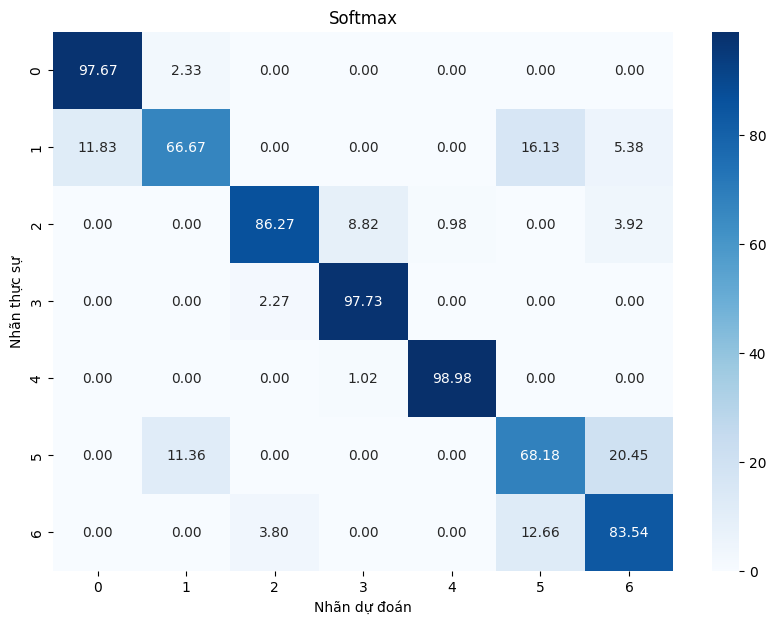

In [11]:
# Tính confusion matrix
cm_softmax = confusion_matrix(y_test, y_pred_softmax)

# Chuyển confusion matrix thành tỷ lệ
cm_percentage_softmax = cm_softmax.astype('float') / cm_softmax.sum(axis=1)[:, np.newaxis] * 100

# Vẽ confusion matrix dưới dạng tỷ lệ
plt.figure(figsize=(10, 7))
sns.heatmap(cm_percentage_softmax, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Softmax')
plt.xlabel('Nhãn dự đoán')
plt.ylabel('Nhãn thực sự')
plt.show()

c:\Users\Admin\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWar

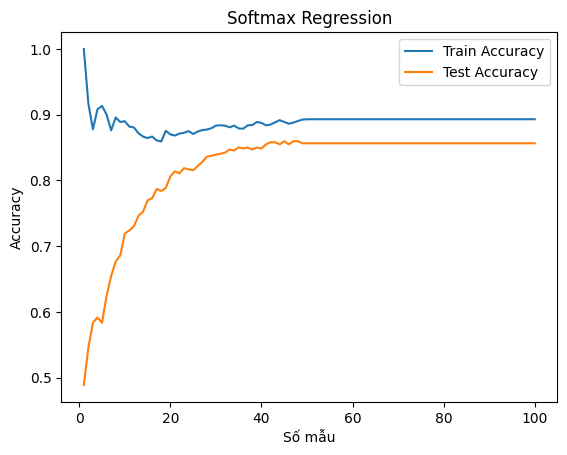

In [12]:
from sklearn.metrics import accuracy_score

train_accuracy = []
test_accuracy = []

for epoch in range(1, 101):  
    log_reg_model.fit(X_train[:epoch * 30], y_train[:epoch * 30])  

    train_accuracy.append(accuracy_score(y_train[:epoch * 30], log_reg_model.predict(X_train[:epoch * 30])))
    test_accuracy.append(accuracy_score(y_test, log_reg_model.predict(X_test)))

# Vẽ Learning Curve
plt.plot(range(1, 101), train_accuracy, label='Train Accuracy')
plt.plot(range(1, 101), test_accuracy, label='Test Accuracy')
plt.xlabel('Số mẫu')
plt.ylabel('Accuracy')
plt.title('Softmax Regression')
plt.legend()
plt.show()

Dùng SVM Multi Class

In [13]:
# Dùng One - vs - ALL

from sklearn.svm import SVC

svm_model = SVC(kernel='linear', decision_function_shape='ovr')

svm_model.fit(X_train, y_train)

y_pred_ovr = svm_model.predict(X_test)

print(classification_report(y_test, y_pred_ovr))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        86
           1       0.92      0.85      0.88        93
           2       0.98      0.93      0.95       102
           3       0.94      1.00      0.97        88
           4       1.00      0.99      0.99        98
           5       0.88      0.89      0.88        88
           6       0.91      0.90      0.90        79

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634



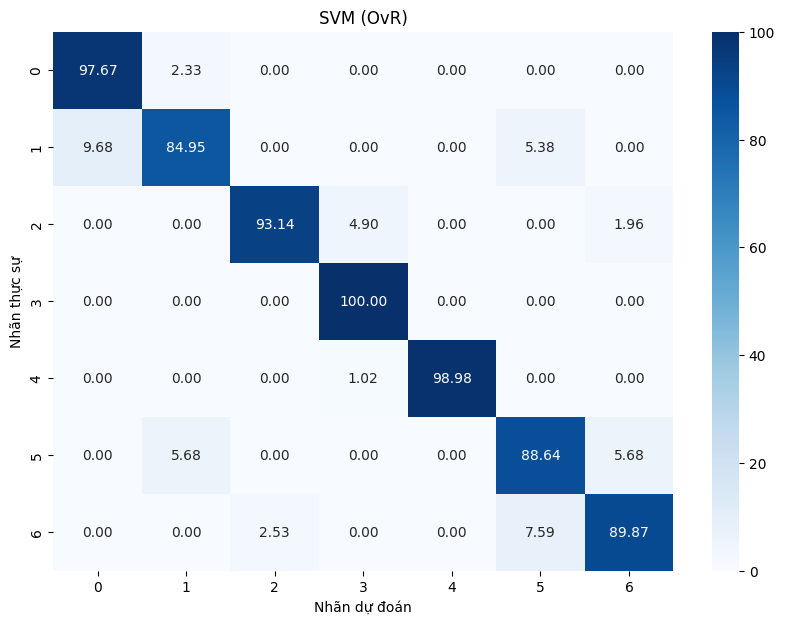

In [14]:
# Tính confusion matrix
cm_ovr = confusion_matrix(y_test, y_pred_ovr)

# Chuyển confusion matrix thành tỷ lệ
cm_percentage_ovr = cm_ovr.astype('float') / cm_ovr.sum(axis=1)[:, np.newaxis] * 100

# Vẽ confusion matrix dưới dạng tỷ lệ
plt.figure(figsize=(10, 7))
sns.heatmap(cm_percentage_ovr, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('SVM (OvR)')
plt.xlabel('Nhãn dự đoán')
plt.ylabel('Nhãn thực sự')
plt.show()

In [15]:
# Dùng kernel rbf

from sklearn.model_selection import GridSearchCV

# Tìm kiếm tham số tối ưu
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='rbf', decision_function_shape='ovr'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# In ra tham số tối ưu
print("Best parameters found: ", grid_search.best_params_)

# Dự đoán và đánh giá
y_pred_rbf_2 = grid_search.predict(X_test)
print(classification_report(y_test, y_pred_rbf_2))

Best parameters found:  {'C': 100, 'gamma': 0.1}
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        86
           1       0.68      0.82      0.75        93
           2       0.96      0.88      0.92       102
           3       1.00      0.99      0.99        88
           4       1.00      0.99      0.99        98
           5       0.82      0.80      0.81        88
           6       0.88      0.85      0.86        79

    accuracy                           0.89       634
   macro avg       0.90      0.89      0.90       634
weighted avg       0.90      0.89      0.90       634



In [16]:
# Dùng One - vs - One

svm_model_ovo = SVC(kernel='linear', decision_function_shape='ovo', C=10)
svm_model_ovo.fit(X_train, y_train)

y_pred_ovo = svm_model_ovo.predict(X_test)

print(classification_report(y_test, y_pred_ovo))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        86
           1       0.95      0.89      0.92        93
           2       0.98      0.96      0.97       102
           3       0.96      1.00      0.98        88
           4       1.00      0.99      0.99        98
           5       0.90      0.94      0.92        88
           6       0.95      0.94      0.94        79

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



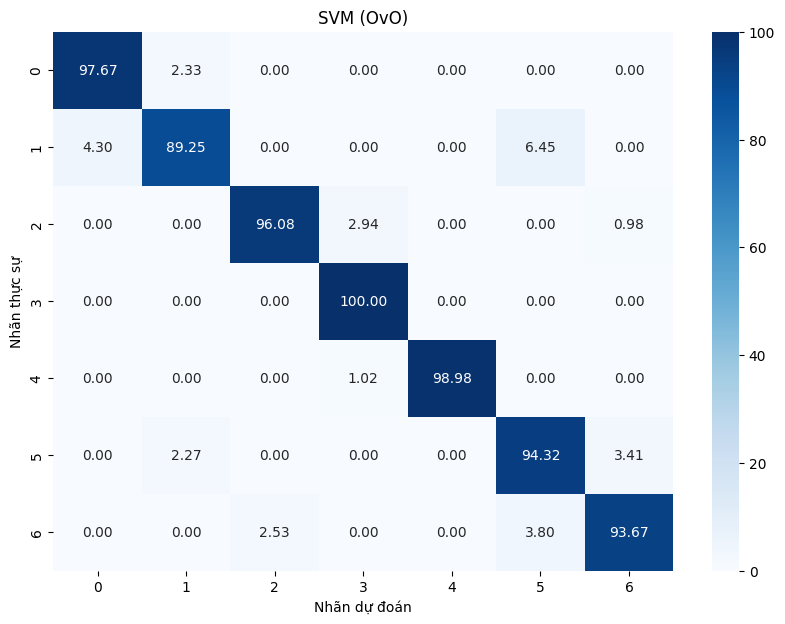

In [17]:
# Tính confusion matrix
cm_ovo = confusion_matrix(y_test, y_pred_ovo)

# Chuyển confusion matrix thành tỷ lệ
cm_percentage_ovo = cm_ovo.astype('float') / cm_ovo.sum(axis=1)[:, np.newaxis] * 100

# Vẽ confusion matrix dưới dạng tỷ lệ
plt.figure(figsize=(10, 7))
sns.heatmap(cm_percentage_ovo, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('SVM (OvO)')
plt.xlabel('Nhãn dự đoán')
plt.ylabel('Nhãn thực sự')
plt.show()

**Chuyển Softmax về bài toán hồi quy**

Thực hiện trên dữ liệu gốc

In [18]:
train_scores = log_reg_model.predict_proba(X_train)
test_scores = log_reg_model.predict_proba(X_test)

In [19]:
# Chọn lớp 
selected_class = 0
y_train = train_scores[:, selected_class]  # Xác suất hoặc logit score cho lớp 0
y_test = test_scores[:, selected_class]

In [20]:
from sklearn.linear_model import LinearRegression

# Hồi quy tuyến tính
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Dự đoán và đánh giá trên tập kiểm tra
y_pred_test = lin_reg.predict(X_test)

# Đánh giá mô hình
mse_original = mean_squared_error(y_test, y_pred_test)
r2_original = r2_score(y_test, y_pred_test)

print("Dữ liệu gốc:")
print(f"MSE: {mse_original:.4f}")
print(f"R2: {r2_original:.4f}")


Dữ liệu gốc:
MSE: 0.0287
R2: 0.6695


Thực hiện trên dữ liệu giảm chiều

In [25]:
from sklearn.decomposition import PCA

# Giảm chiều dữ liệu còn 20 (best)
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [26]:
# Hồi quy tuyến tính trên dữ liệu giảm chiều
lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train_pca, y_train)

LinearRegression()

In [27]:
# Dự đoán và đánh giá trên tập kiểm tra
y_pred_test_pca = lin_reg_pca.predict(X_test_pca)

# Đánh giá mô hình
mse_pca = mean_squared_error(y_test, y_pred_test_pca)
r2_pca = r2_score(y_test, y_pred_test_pca)

print("\nDữ liệu giảm chiều:")
print(f"MSE: {mse_pca:.4f}")
print(f"R2: {r2_pca:.4f}")


Dữ liệu giảm chiều:
MSE: 0.0346
R2: 0.6007


**Nhận xét**
*Kernel RBF vs Linear*:
- Khi dữ liệu có nhiều đặc trưng (nhiều chiều), khoảng cách giữa các điểm trong không gian này trở nên ít ý nghĩa hơn. Điều này là một phần của hiện tượng "curse of dimensionality" (lời nguyền của chiều không gian), tức là khi số chiều tăng lên, các điểm trong không gian trở nên "xa nhau" hơn, và các phép toán về khoảng cách Euclid không còn phản ánh chính xác được sự tương đồng giữa các điểm.
- Kernel RBF sử dụng thông tin từ nhiều điểm xung quanh, giúp tìm ra biên quyết định phi tuyến một cách hiệu quả. Tuy nhiên, khi không gian có quá nhiều chiều, việc tính toán khoảng cách và sự phân tách giữa các lớp dữ liệu trở nên phức tạp hơn, và các hyperparameters như σ cũng cần được điều chỉnh cẩn thận để tránh overfitting.
- Kernel Linear nơi phép nhân trong không gian được tính trực tiếp mà không cần phải chuyển đổi không gian đặc trưng. Trong ko gian nheiefu chiều, dữ lieu có thể đã đủ độc lập và ko có sự chồng lấn quá nhiều. Việc tính toán khoảng cách giwuxa các điểm đơn giản hơn, tránh các vấnề liên quan  chọn tham số trong kernel RBF.


**Nhận xét**
*Multi-class SVM vs Softmax Regression*: